In [1]:
import pandas as pd

# Lee el archivo CSV
data_df = pd.read_csv("Filtered_Resultados_Saber_11.csv")

# Asigna los nombres de las columnas
column_names = ['FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA', 'PUNT_GLOBAL', 'COLE_AREA_UBICACION', 'COLE_COD_DEPTO_UBICACION', 'COLE_CALENDARIO']
data_df.columns = column_names

# Elimina la primera fila del DataFrame
#data_df = data_df.drop(index=0)

# Mover la columna "PUNT_GLOBAL" al final
punt_global_col = data_df.pop('PUNT_GLOBAL')
data_df['PUNT_GLOBAL'] = punt_global_col

# Muestra las primeras filas del DataFrame con los cambios aplicados
data_df.head()



,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,COLE_AREA_UBICACION,COLE_COD_DEPTO_UBICACION,COLE_CALENDARIO,PUNT_GLOBAL
0,No,No,No,No,URBANO,META,A,NaN
1,Si,Si,Si,Si,URBANO,META,A,332.0
2,No,Si,Si,Si,URBANO,META,A,257.0
3,No,Si,No,Si,URBANO,META,A,251.0
4,No,Si,No,Si,URBANO,META,A,251.0


In [1]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats
from sklearn.linear_model import Lasso

In [24]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)

## Tarea 3: Exploracion de datos


3. Tarea 3: Exploracion de datos

>3.1 Analisis datos numéricos

>3.2 Analisis variables categóricos/cualitativas

>3.3 Búsqueda de relaciones con la variable objetivo

>3.4 Búsqueda de relaciones entre las variables de entrada

>3.5 Datos atipicos



### 3.1 Análisis datos categoricos


Automovil

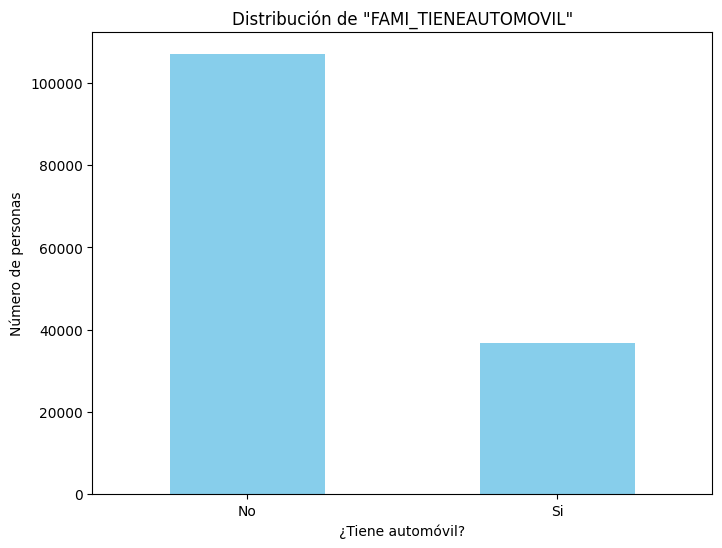

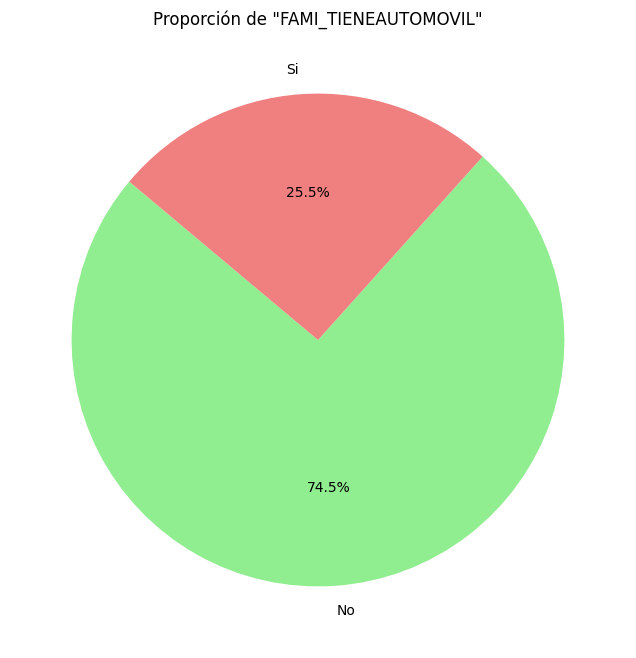

In [42]:
# Calcular el recuento de cada categoría
counts = data_df['FAMI_TIENEAUTOMOVIL'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de "FAMI_TIENEAUTOMOVIL"')
plt.xlabel('¿Tiene automóvil?')
plt.ylabel('Número de personas')
plt.xticks(rotation=0)
plt.show()

# Crear el diagrama de pastel
plt.figure(figsize=(8, 8))
counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title('Proporción de "FAMI_TIENEAUTOMOVIL"')
plt.ylabel('')
plt.show()

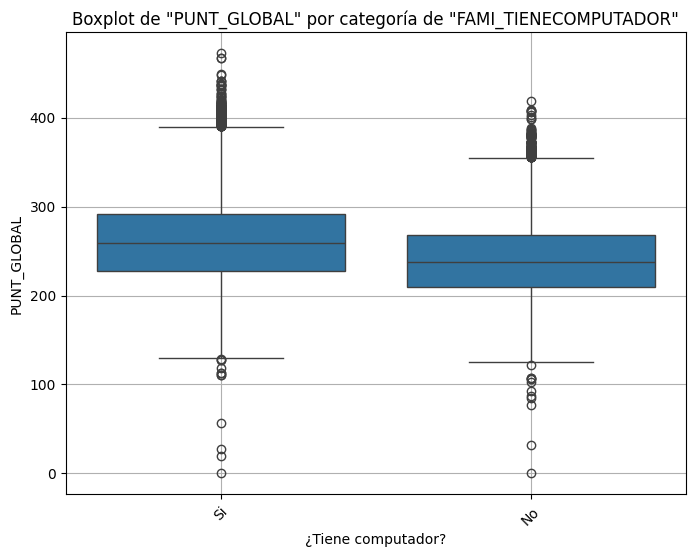

  ¿Tiene automóvil?  Frecuencia
0                No      106956
1                Si       36673


In [14]:

# Crea un boxplot de 'PUNT_GLOBAL' para cada categoría de 'FAMI_TIENECOMPUTADOR'
plt.figure(figsize=(8, 6))
sns.boxplot(x='FAMI_TIENECOMPUTADOR', y='PUNT_GLOBAL', data=data_df)
plt.title('Boxplot de "PUNT_GLOBAL" por categoría de "FAMI_TIENECOMPUTADOR"')
plt.xlabel('¿Tiene computador?')
plt.ylabel('PUNT_GLOBAL')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Tabla de frecuencia de la variable 'FAMI_TIENEAUTOMOVIL'
fami_auto_frequency_table = data_df['FAMI_TIENEAUTOMOVIL'].value_counts().reset_index()
fami_auto_frequency_table.columns = ['¿Tiene automóvil?', 'Frecuencia']
print(fami_auto_frequency_table)


Computador

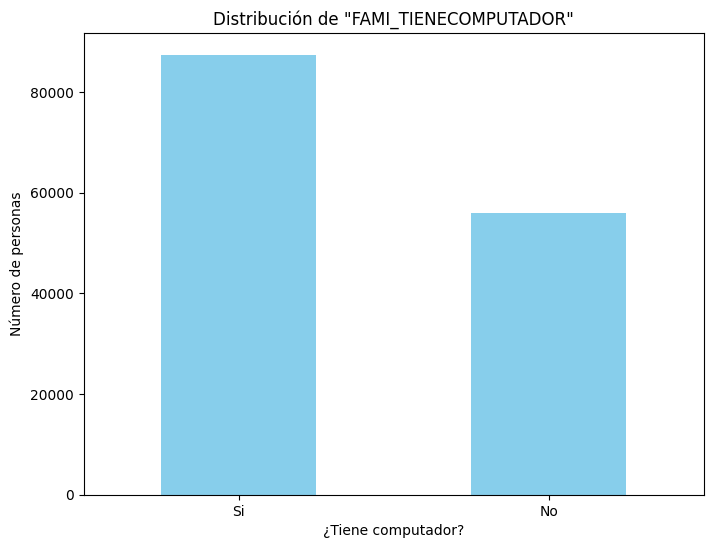

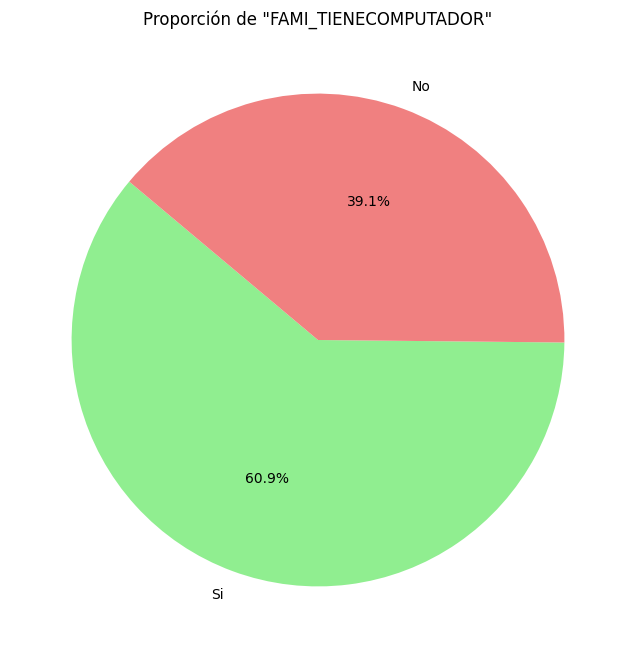

In [17]:
# Calcular el recuento de cada categoría
counts_fami_computador = data_df['FAMI_TIENECOMPUTADOR'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
counts_fami_computador.plot(kind='bar', color='skyblue')
plt.title('Distribución de "FAMI_TIENECOMPUTADOR"')
plt.xlabel('¿Tiene computador?')
plt.ylabel('Número de personas')
plt.xticks(rotation=0)
plt.show()

# Crear el diagrama de pastel
plt.figure(figsize=(8, 8))
counts_fami_computador.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title('Proporción de "FAMI_TIENECOMPUTADOR"')
plt.ylabel('')
plt.show()


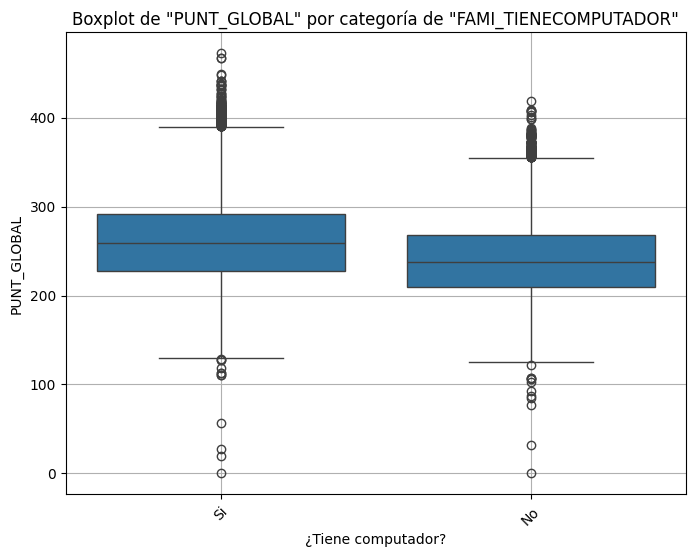

  ¿Tiene automóvil?  Frecuencia
0                No      106956
1                Si       36673


In [18]:
# Crea un boxplot de 'PUNT_GLOBAL' para cada categoría de 'FAMI_TIENECOMPUTADOR'
plt.figure(figsize=(8, 6))
sns.boxplot(x='FAMI_TIENECOMPUTADOR', y='PUNT_GLOBAL', data=data_df)
plt.title('Boxplot de "PUNT_GLOBAL" por categoría de "FAMI_TIENECOMPUTADOR"')
plt.xlabel('¿Tiene computador?')
plt.ylabel('PUNT_GLOBAL')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Tabla de frecuencia de la variable 'FAMI_TIENEAUTOMOVIL'
fami_auto_frequency_table = data_df['FAMI_TIENEAUTOMOVIL'].value_counts().reset_index()
fami_auto_frequency_table.columns = ['¿Tiene automóvil?', 'Frecuencia']
print(fami_auto_frequency_table)


Internet

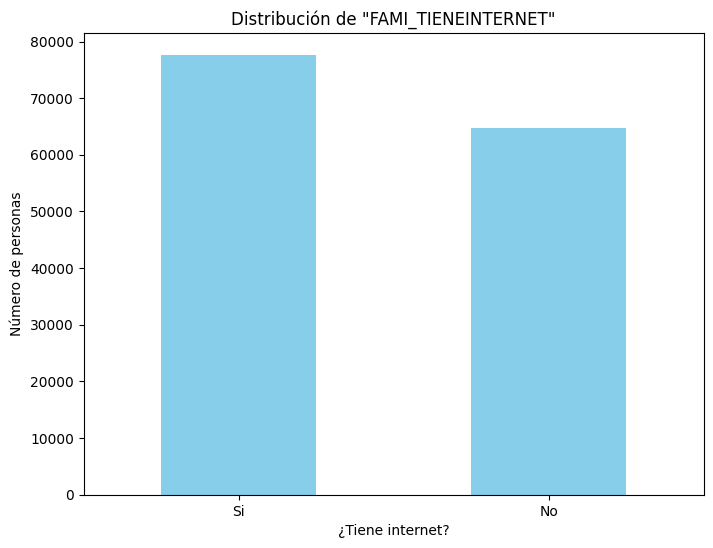

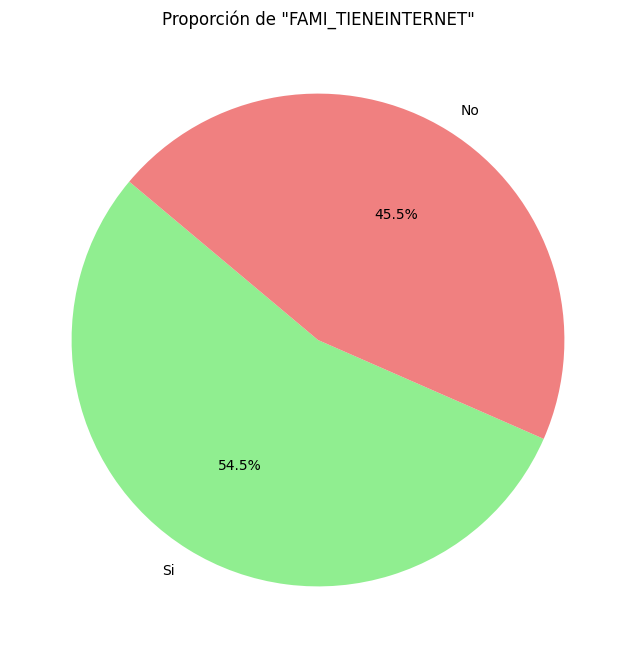

In [19]:
# Calcular el recuento de cada categoría
counts_fami_internet = data_df['FAMI_TIENEINTERNET'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
counts_fami_internet.plot(kind='bar', color='skyblue')
plt.title('Distribución de "FAMI_TIENEINTERNET"')
plt.xlabel('¿Tiene internet?')
plt.ylabel('Número de personas')
plt.xticks(rotation=0)
plt.show()

# Crear el diagrama de pastel
plt.figure(figsize=(8, 8))
counts_fami_internet.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title('Proporción de "FAMI_TIENEINTERNET"')
plt.ylabel('')
plt.show()


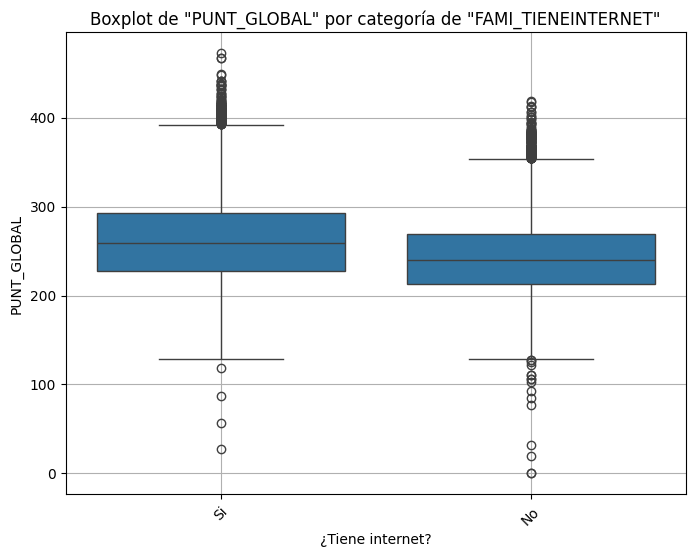

  ¿Tiene internet?  Frecuencia
0               Si       77670
1               No       64741


In [25]:
# Crea un boxplot de 'PUNT_GLOBAL' para cada categoría de 'FAMI_TIENEINTERNET'
plt.figure(figsize=(8, 6))
sns.boxplot(x='FAMI_TIENEINTERNET', y='PUNT_GLOBAL', data=data_df)
plt.title('Boxplot de "PUNT_GLOBAL" por categoría de "FAMI_TIENEINTERNET"')
plt.xlabel('¿Tiene internet?')
plt.ylabel('PUNT_GLOBAL')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Tabla de frecuencia de la variable 'FAMI_TIENEINTERNET'
fami_internet_frequency_table = data_df['FAMI_TIENEINTERNET'].value_counts().reset_index()
fami_internet_frequency_table.columns = ['¿Tiene internet?', 'Frecuencia']
print(fami_internet_frequency_table)


Lavadora

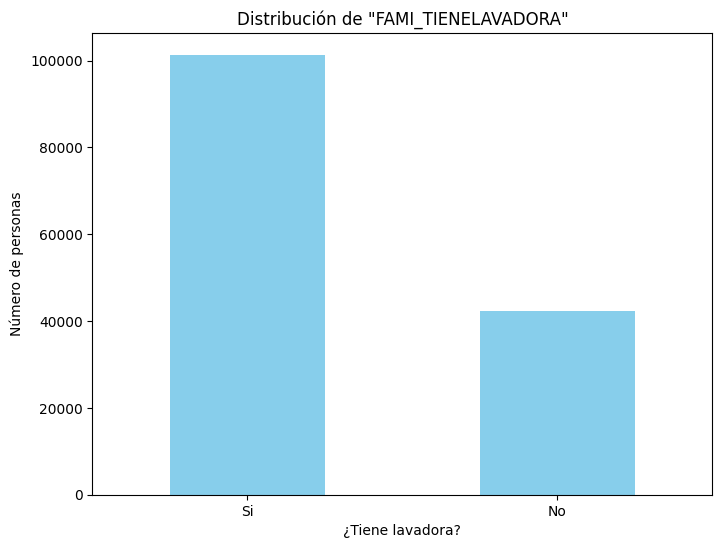

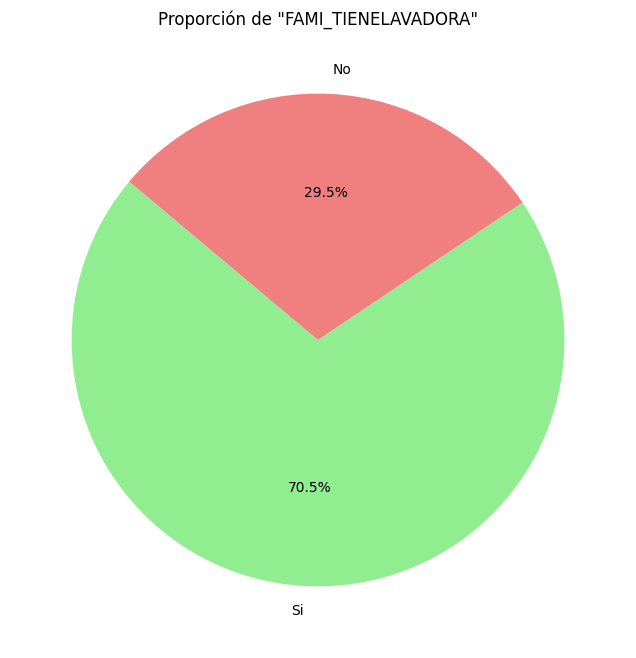

In [20]:
# Calcular el recuento de cada categoría
counts_fami_lavadora = data_df['FAMI_TIENELAVADORA'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
counts_fami_lavadora.plot(kind='bar', color='skyblue')
plt.title('Distribución de "FAMI_TIENELAVADORA"')
plt.xlabel('¿Tiene lavadora?')
plt.ylabel('Número de personas')
plt.xticks(rotation=0)
plt.show()

# Crear el diagrama de pastel
plt.figure(figsize=(8, 8))
counts_fami_lavadora.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title('Proporción de "FAMI_TIENELAVADORA"')
plt.ylabel('')
plt.show()


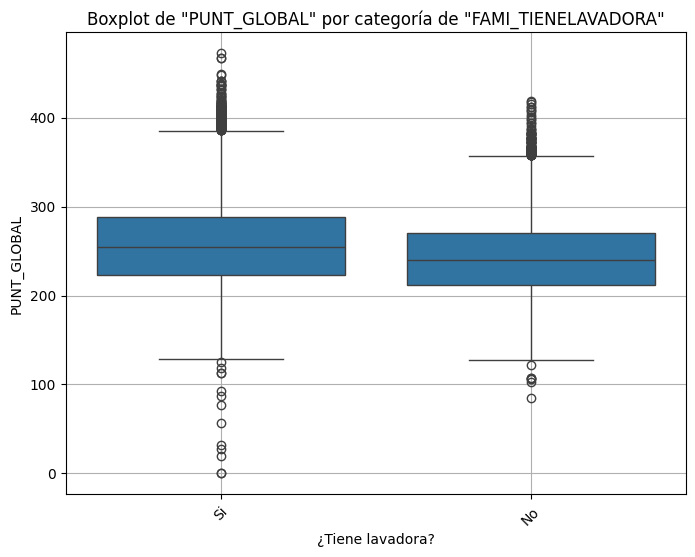

  ¿Tiene lavadora?  Frecuencia
0               Si      101369
1               No       42354


In [26]:
# Crea un boxplot de 'PUNT_GLOBAL' para cada categoría de 'FAMI_TIENELAVADORA'
plt.figure(figsize=(8, 6))
sns.boxplot(x='FAMI_TIENELAVADORA', y='PUNT_GLOBAL', data=data_df)
plt.title('Boxplot de "PUNT_GLOBAL" por categoría de "FAMI_TIENELAVADORA"')
plt.xlabel('¿Tiene lavadora?')
plt.ylabel('PUNT_GLOBAL')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Tabla de frecuencia de la variable 'FAMI_TIENELAVADORA'
fami_lavadora_frequency_table = data_df['FAMI_TIENELAVADORA'].value_counts().reset_index()
fami_lavadora_frequency_table.columns = ['¿Tiene lavadora?', 'Frecuencia']
print(fami_lavadora_frequency_table)


Ubicación

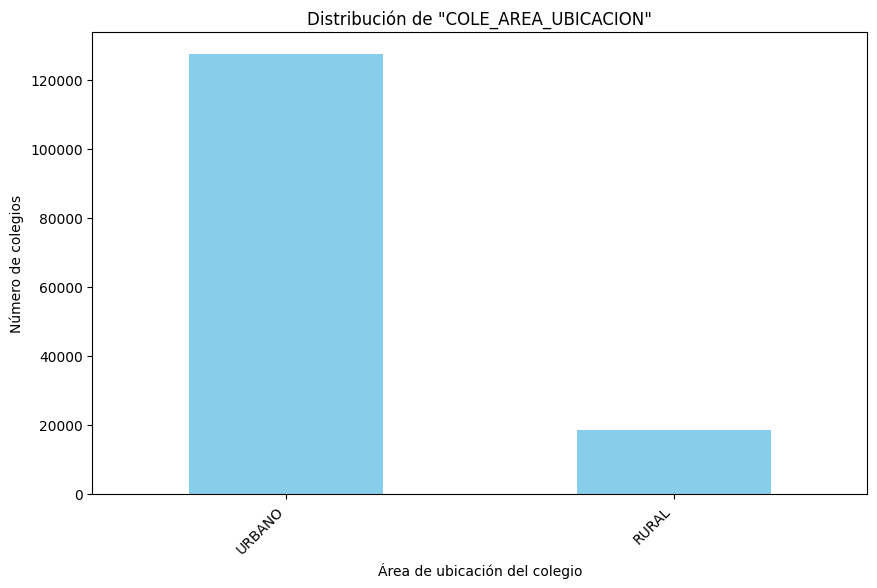

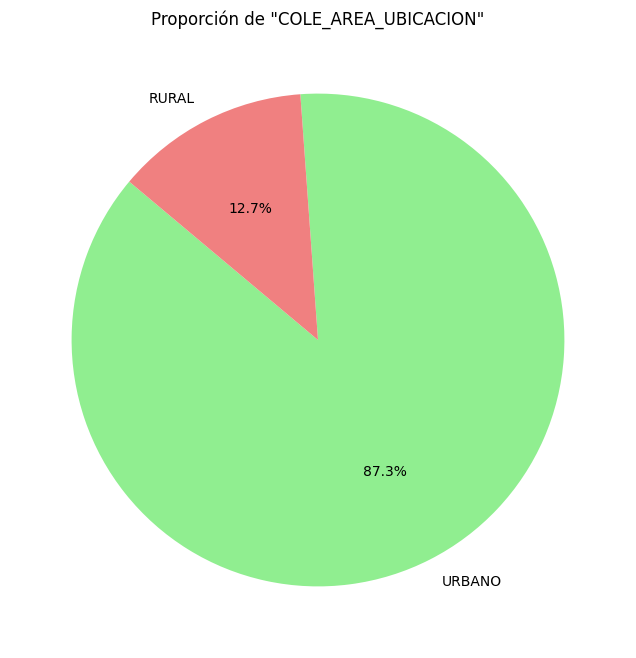

In [21]:
# Calcular el recuento de cada categoría
counts_cole_area = data_df['COLE_AREA_UBICACION'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
counts_cole_area.plot(kind='bar', color='skyblue')
plt.title('Distribución de "COLE_AREA_UBICACION"')
plt.xlabel('Área de ubicación del colegio')
plt.ylabel('Número de colegios')
plt.xticks(rotation=45, ha='right')
plt.show()

# Crear el diagrama de pastel
plt.figure(figsize=(8, 8))
counts_cole_area.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title('Proporción de "COLE_AREA_UBICACION"')
plt.ylabel('')
plt.show()


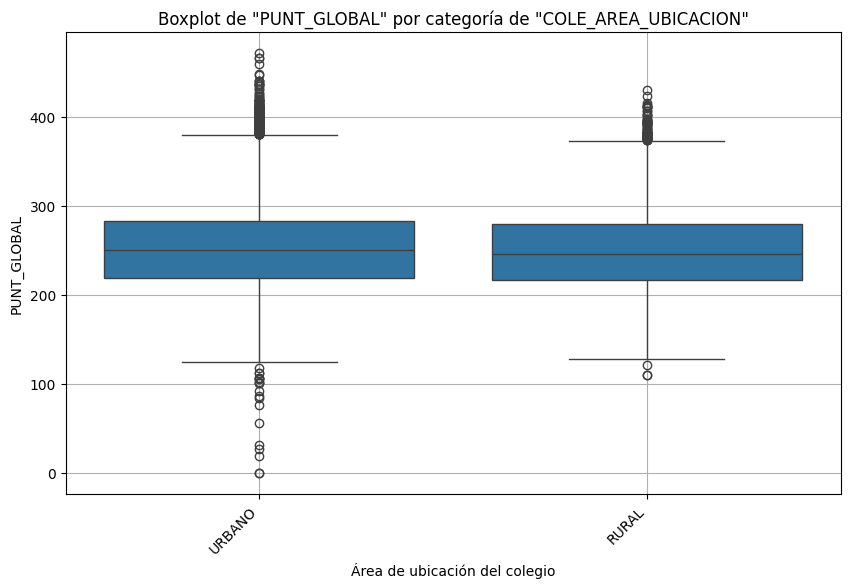

  Área de ubicación del colegio  Frecuencia
0                        URBANO      127393
1                         RURAL       18612


In [27]:
# Crea un boxplot de 'PUNT_GLOBAL' para cada categoría de 'COLE_AREA_UBICACION'
plt.figure(figsize=(10, 6))
sns.boxplot(x='COLE_AREA_UBICACION', y='PUNT_GLOBAL', data=data_df)
plt.title('Boxplot de "PUNT_GLOBAL" por categoría de "COLE_AREA_UBICACION"')
plt.xlabel('Área de ubicación del colegio')
plt.ylabel('PUNT_GLOBAL')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

# Tabla de frecuencia de la variable 'COLE_AREA_UBICACION'
cole_area_frequency_table = data_df['COLE_AREA_UBICACION'].value_counts().reset_index()
cole_area_frequency_table.columns = ['Área de ubicación del colegio', 'Frecuencia']
print(cole_area_frequency_table)


### 3.4 Datos atipicos

### 3.3 Búsqueda de relaciones con la variable objetivo



In [72]:


# Lee el archivo CSV
data_df = pd.read_csv("Filtered_Resultados_Saber_11.csv")

# Asigna los nombres de las columnas
column_names = ['FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA', 'PUNT_GLOBAL', 'COLE_AREA_UBICACION', 'COLE_COD_DEPTO_UBICACION', 'COLE_CALENDARIO']
data_df.columns = column_names

# Elimina la primera fila del DataFrame
data_df = data_df.drop(index=0)

# Mover la columna "PUNT_GLOBAL" al final
punt_global_col = data_df.pop('PUNT_GLOBAL')
data_df['PUNT_GLOBAL'] = punt_global_col

# Variables a convertir en dummy
variables_dummy = ['FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA', 'COLE_AREA_UBICACION']

# Convertir variables categóricas en variables dummy y agregarlas al DataFrame
for variable in variables_dummy:
    dummies = pd.get_dummies(data_df[variable], prefix=variable, drop_first=True)
    data_df = pd.concat([data_df, dummies], axis=1)

# Mostrar las primeras filas del DataFrame con las nuevas variables dummy y las variables originales
print(data_df.head())



  FAMI_TIENEAUTOMOVIL FAMI_TIENECOMPUTADOR FAMI_TIENEINTERNET  \
1                  Si                   Si                 Si   
2                  No                   Si                 Si   
3                  No                   Si                 No   
4                  No                   Si                 No   
5                  Si                   Si                 Si   

  FAMI_TIENELAVADORA COLE_AREA_UBICACION COLE_COD_DEPTO_UBICACION  \
1                 Si              URBANO                     META   
2                 Si              URBANO                     META   
3                 Si              URBANO                     META   
4                 Si              URBANO                     META   
5                 Si              URBANO                     META   

  COLE_CALENDARIO  PUNT_GLOBAL  FAMI_TIENEAUTOMOVIL_Si  \
1               A        332.0                    True   
2               A        257.0                   False   
3               A   

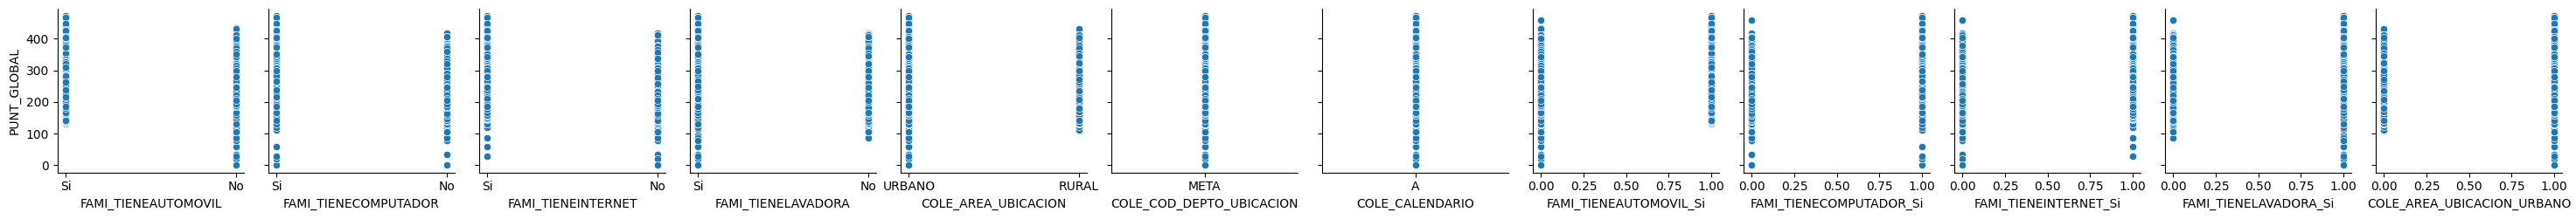

In [63]:

# Obtener todas las características excepto 'date' y 'PUNT_GLOBAL'
caracteristicas_excepto_date_y_punt_global = [col for col in data_df.columns if col not in ['date', 'PUNT_GLOBAL']]

# Trazar el pairplot con las características excepto 'date' y 'PUNT_GLOBAL' en el eje x
sns.pairplot(data_df, y_vars="PUNT_GLOBAL", x_vars=caracteristicas_excepto_date_y_punt_global, kind="scatter")


##### 3.4.1 Búsqueda de relaciones entre las variables de entrada


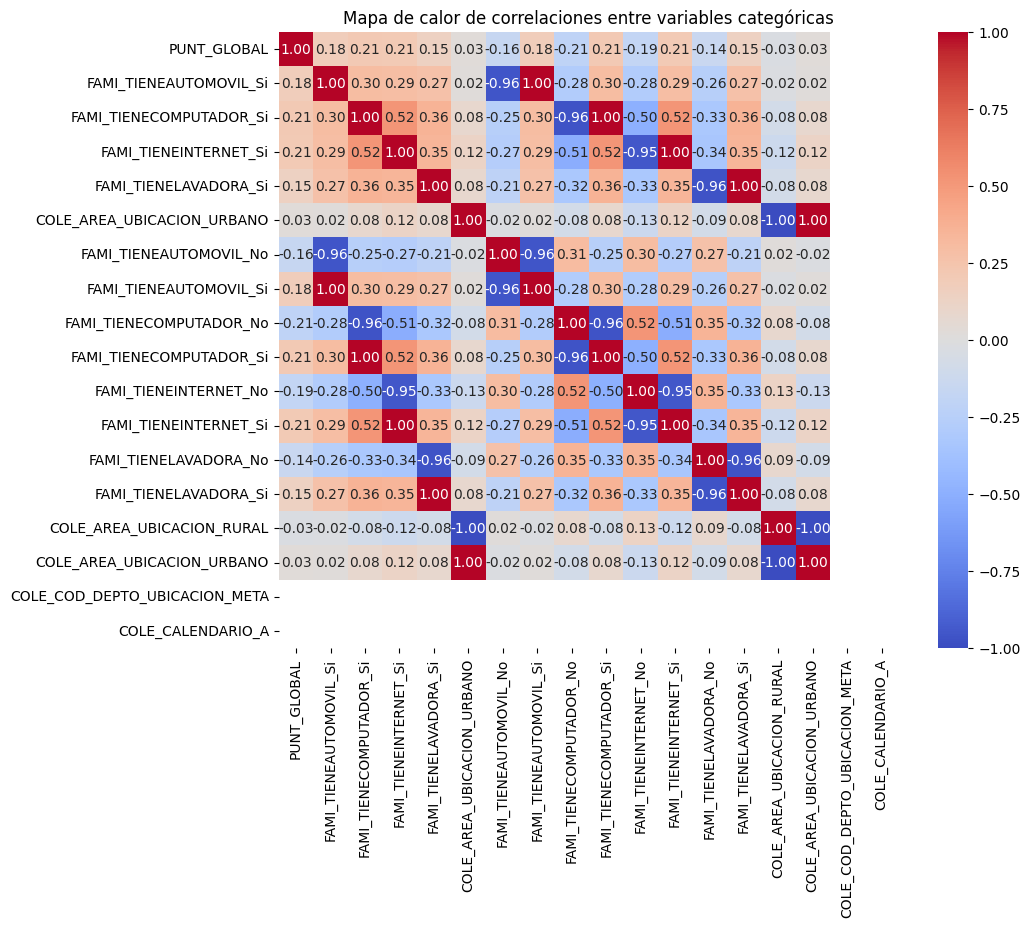

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Codificación one-hot de las variables categóricas
data_encoded = pd.get_dummies(data_df)

# Calcular la matriz de correlación
correlation_matrix = data_encoded.corr()

# Crear el mapa de calor de las correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlaciones entre variables categóricas')
plt.show()

